In [ ]:
!pip install konlpy

In [ ]:
!apt-get update -qq

In [ ]:
!apt-get install fonts-nanum* -qq

In [ ]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/sh

In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font',family=font_name)
fm._rebuild()

NanumGothic Eco


In [ ]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import numpy as np
import matplotlib.pyplot as plt
import io

train_df=pd.read_csv('/content/drive/My Drive/your data','\t')
test_df=pd.read_csv('/content/drive/My Drive/your data','\t')


In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
def tokenize(doc):
    #형태소와 품사를 join
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

In [ ]:
train_df.isnull().any() #document에 null값이 있다.
train_df['document'] = train_df['document'].fillna(''); #null값을 ''값으로 대체

test_df.isnull().any()
test_df['document'] = test_df['document'].fillna(''); #null값을 ''값으로 대체

In [ ]:
#tokenize 과정은 시간이 오래 걸릴수 있음...
train_docs = [(tokenize(row[1]), row[2]) for row in train_df.values]
test_docs = [(tokenize(row[1]), row[2]) for row in test_df.values]

In [ ]:
print(train_docs[0])
print(test_docs[0])

(['아/Exclamation', '더빙/Noun', '../Punctuation', '진짜/Noun', '짜증나다/Adjective', '목소리/Noun'], 0)
(['굳다/Adjective', 'ㅋ/KoreanParticle'], 1)


In [ ]:
tokens = [t for d in train_docs for t in d[0]]
print("토큰개수:", len(tokens))

토큰개수: 2159921


In [ ]:
import nltk
text = nltk.Text(tokens, name='NMSC')

#토큰개수
print(len(text.tokens))

#중복을 제외한 토큰개수
print(len(set(text.tokens)))

#출력빈도가 높은 상위 토큰 10개
print(text.vocab().most_common(10))

2159921
49894
[('./Punctuation', 67778), ('영화/Noun', 50818), ('하다/Verb', 41209), ('이/Josa', 38540), ('보다/Verb', 38538), ('의/Josa', 30188), ('../Punctuation', 29055), ('가/Josa', 26627), ('에/Josa', 26468), ('을/Josa', 23118)]


In [ ]:
%matplotlib inline

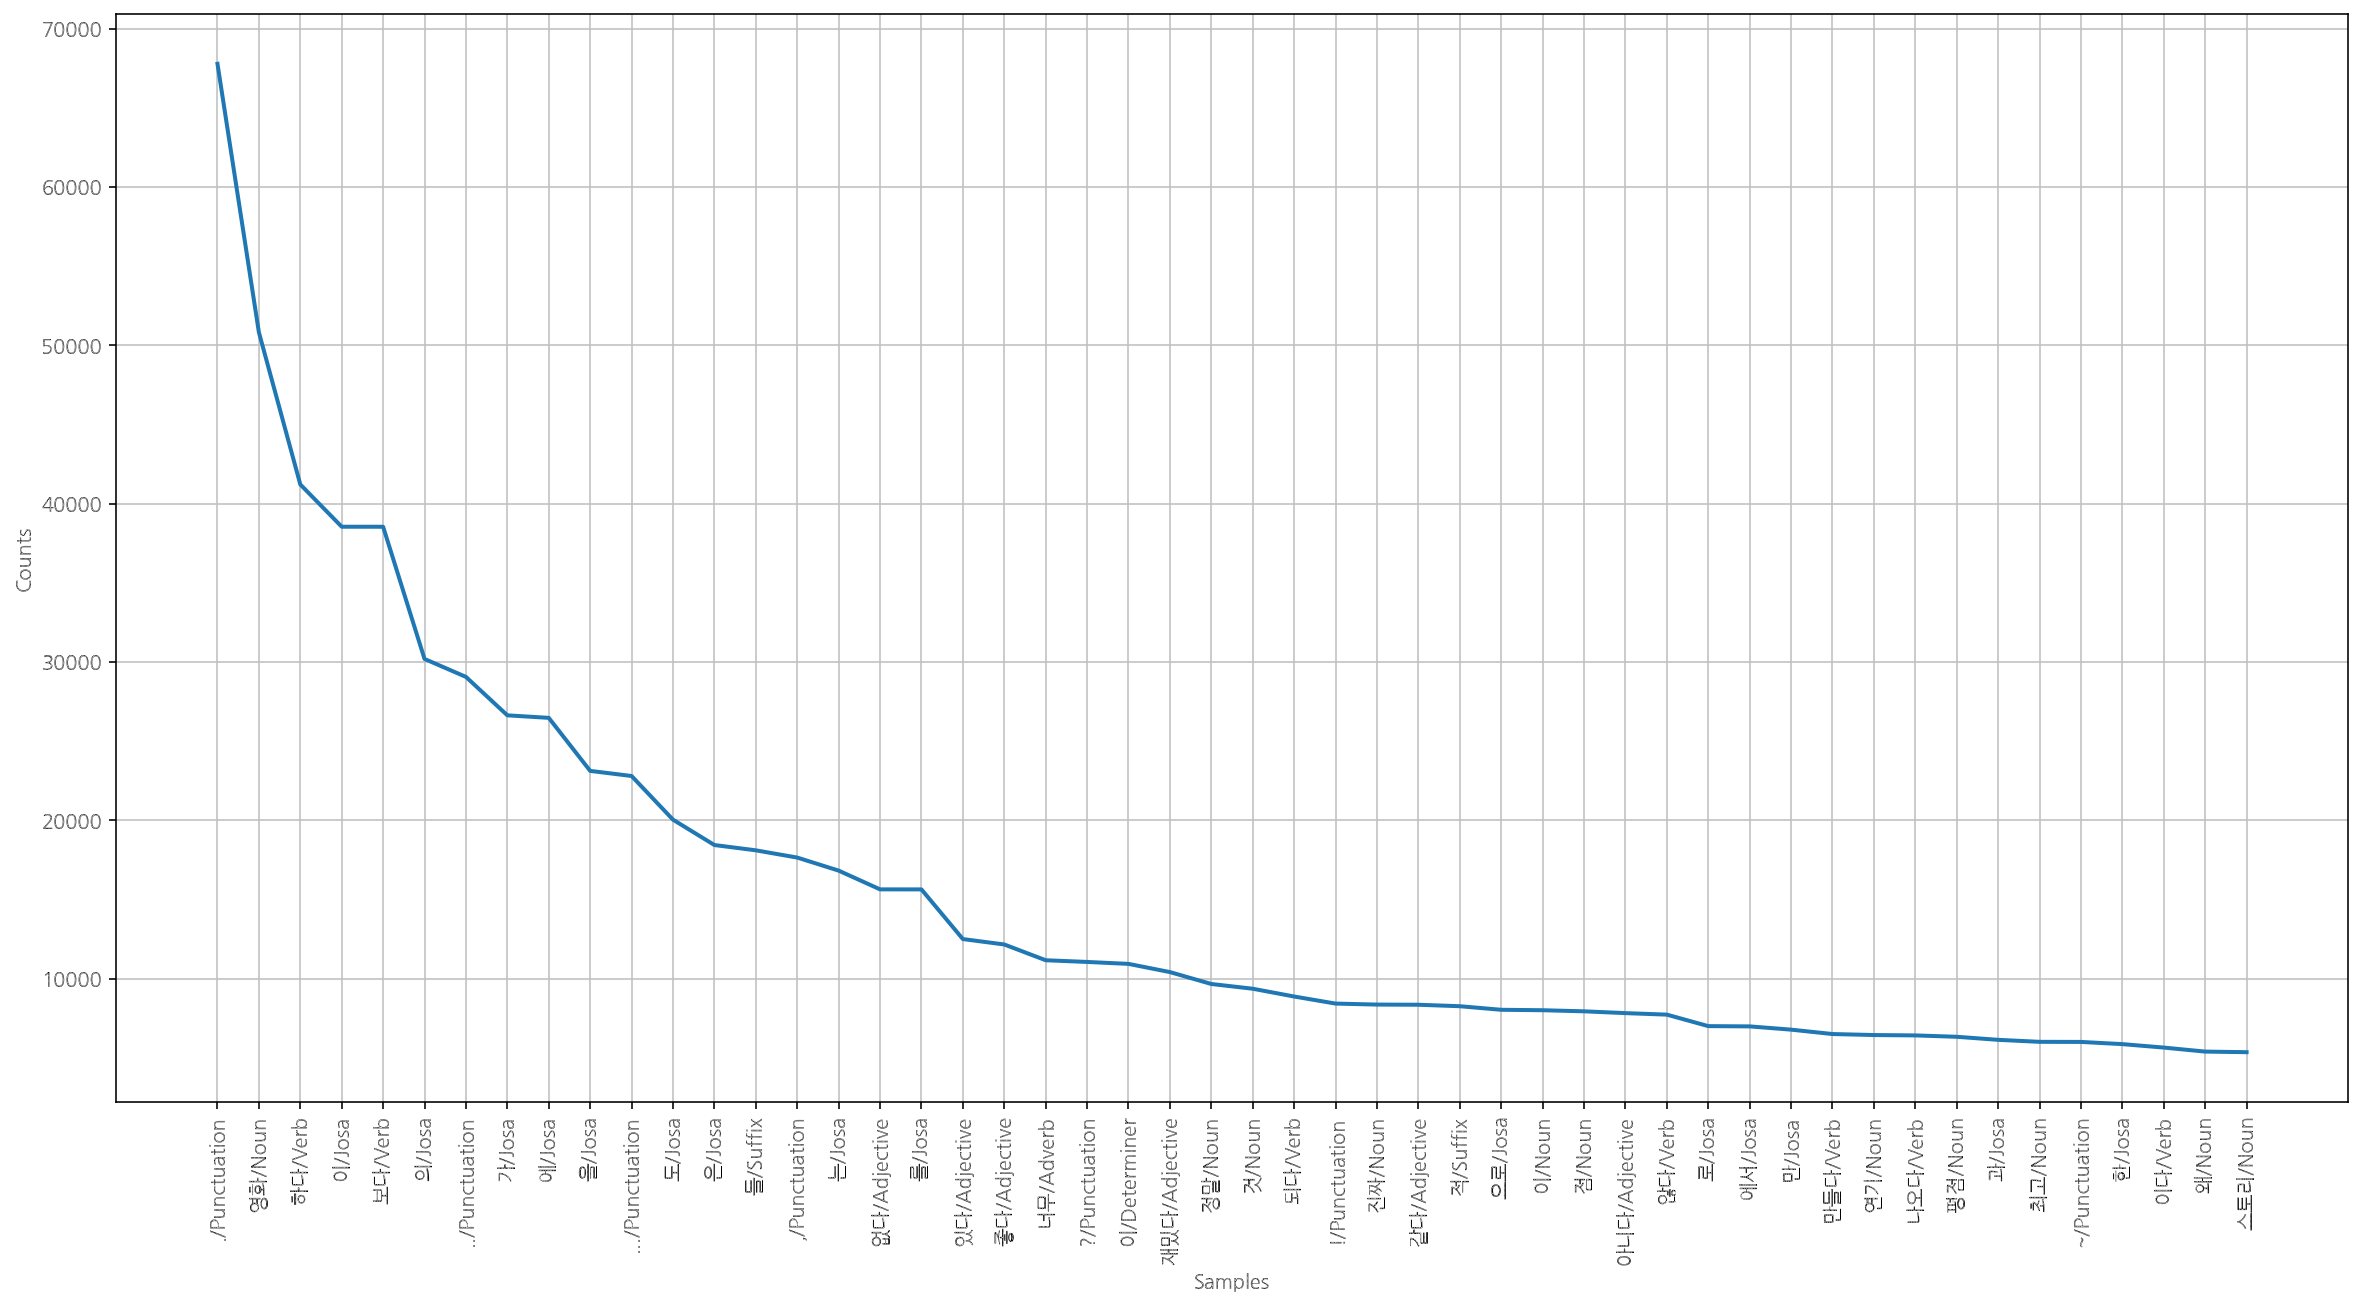

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
text.plot(50)

In [ ]:
FREQUENCY_COUNT = 1000; #시간적 여유가 있다면 10000개를 해보도록~

In [ ]:
selected_words = [f[0] for f in text.vocab().most_common(FREQUENCY_COUNT)]

In [ ]:
#단어리스트 문서에서 상위 10000개들중 포함되는 단어들이 개수
def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

In [ ]:
#문서에 들어가는 단어 개수
x_train = [term_frequency(d) for d,_ in train_docs]
x_test = [term_frequency(d) for d,_ in test_docs]

In [ ]:
#라벨(1 or 0)
y_train = [c for _,c in train_docs]
y_test = [c for _,c in test_docs]

In [ ]:
x_train = np.asarray(x_train).astype('float32')
x_test = np.asarray(x_test).astype('float32')

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [ ]:
import tensorflow as tf

#레이어 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
#학습 프로세스 설정
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
    loss=tf.keras.losses.binary_crossentropy,
    metrics=[tf.keras.metrics.binary_accuracy]
    )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
#학습 데이터로 학습
model.fit(x_train, y_train, epochs=10, batch_size=512)

Epoch 1/10
293/293 [==============================] - 3s 8ms/step - loss: 0.4308 - binary_accuracy: 0.8031
Epoch 2/10
293/293 [==============================] - 2s 8ms/step - loss: 0.3803 - binary_accuracy: 0.8249
Epoch 3/10
293/293 [==============================] - 2s 7ms/step - loss: 0.3648 - binary_accuracy: 0.8342
Epoch 4/10
293/293 [==============================] - 2s 7ms/step - loss: 0.3519 - binary_accuracy: 0.8410
Epoch 5/10
293/293 [==============================] - 2s 7ms/step - loss: 0.3400 - binary_accuracy: 0.8485
Epoch 6/10
293/293 [==============================] - 3s 9ms/step - loss: 0.3284 - binary_accuracy: 0.8543
Epoch 7/10
293/293 [==============================] - 2s 7ms/step - loss: 0.3174 - binary_accuracy: 0.8609
Epoch 8/10
293/293 [==============================] - 2s 7ms/step - loss: 0.3059 - binary_accuracy: 0.8666
Epoch 9/10
293/293 [==============================] - 2s 7ms/step - loss: 0.2951 - binary_accuracy: 0.8716
Epoch 10/10
293/293 [================

In [ ]:
results = model.evaluate(x_test, y_test)

1563/1563 [==============================] - 2s 1ms/step - loss: 0.3946 - binary_accuracy: 0.8288


In [ ]:
#loss: 0.5, acc: 0.7
results

[0.39457541704177856, 0.828819990158081]

In [ ]:
review = "아주 재미 있어요"
token = tokenize(review)
token


['아주/Noun', '재미/Noun', '있다/Adjective']

In [ ]:
tf = term_frequency(token)
data = np.expand_dims(np.asarray(tf).astype('float32'), axis=0)

In [ ]:
float(model.predict(data))

0.927926778793335

In [ ]:
def predict_review(review):
    token = tokenize(review)
    tfq = term_frequency(token)
    data = np.expand_dims(np.asarray(tfq).astype('float32'), axis=0)
    score = float(model.predict(data))
    if(score > 0.5):
        print(f"{review} ==> 긍정 ({round(score*100)}%)")
    else:
        print(f"{review} ==> 부정 ({round((1-score)*100)}%)")

In [ ]:
predict_review("재미 정말 없어요")

재미 정말 없어요 ==> 부정 (97%)


In [ ]:
predict_review('진짜 별로')

진짜 별로 ==> 부정 (98%)


In [ ]:
predict_review('조금 어렵지만 재밌음ㅋㅋ') 

조금 어렵지만 재밌음ㅋㅋ ==> 긍정 (98%)


In [ ]:
predict_review('안좋다')

안좋다 ==> 부정 (55%)


In [ ]:
predict_review('필요한게 없다')

필요한게 없다 ==> 부정 (72%)


In [ ]:
predict_review('거기는 좋지 않다')

거기는 좋지 않다 ==> 부정 (69%)


In [ ]:
df1=pd.read_csv('/content/drive/My Drive/your data',  error_bad_lines=False)
df2=pd.read_csv('/content/drive/My Drive/your data',  error_bad_lines=False)
df3=pd.read_csv('/content/drive/My Drive/your data',  error_bad_lines=False)
df4=pd.read_csv('/content/drive/My Drive/your data',  error_bad_lines=False)

In [ ]:
cdf1=df1[['Review', 'Score']]
pd.to_numeric(cdf1.Score)
cdf1.head()

In [ ]:
cdf2=df2[['Review', 'Score']]
cdf2.Score=pd.to_numeric(cdf2.Score, errors='coerce')
cdf2=cdf2.dropna()
#cdf2.head()
cdf2[310:320]

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Review,Score
310,"각 지역마다 세워진 조선이 교육기관입니다. 전주 향교는 앞에 대성전, 뒤에 명륜당이...",4.0
311,조선시대 양반 자제들이 공부하는 곳이 향교라고 하죠. 전주향교 역시 그런 곳입니다....,3.0
312,활기찬 현재의 한옥마을에서 잠시나마 조선시대의 여유를 즐길 수 있는 곳...향교는 ...,4.0
313,사람들이 많지 않아서 조용히 둘러보고 오기 좋았습니다. 봄이 시작되어 잔디와 나무에...,4.0
314,한옥마을 끝자라에 있고 맞은편에는 국립무형문화원이 있다. 작은 성균관이라 볼 수 있...,4.0
315,한옥 마을 안에 위치해요~ 조선시대 교육을 담당했던 곳이죠~ ~~가을에 가면 아름다...,4.0
316,한옥마을 안에 위치해 있어요여기서 드라마나 영화 촬영도 많이 한거 같아요깨끗하게 관...,4.0
317,향교는 노오란 옷을 입고 맞이해줍니다.오래된 나무로 인해 사극 드라마에도 많이 나와...,4.0
319,불과 몇년전 전주를 왔을때 들렸던 막걸리골목보다 조금은 활기차지긴 했지만 그때 느꼈...,3.0
320,막걸리를 한병 시키면 다양한 안주가 따라 나오던예전의 매력은 떨어지지만가족여행객들이...,4.0


In [ ]:
cdf4=df4[['Review', 'Score']]
cdf4.head()
pd.to_numeric(cdf4.Score)
print(type(cdf4.Score[10]))

<class 'numpy.int64'>


In [ ]:
total_data = pd.concat([cdf1,cdf2,cdf4])
#total_data[5100:]
print(len(total_data))

5444


In [ ]:
pd.to_numeric(total_data.Score)
#print(type(total_data.Score))
#df_negative = total_data[(total_data.Score == '1.0') | (total_data.Score == '2.0') | (total_data.Score == '0.5') |(total_data.Score == '1.5')].copy()
#df_negative = total_data[(total_data.Score == 1.0) | (total_data.Score == 2.0) | (total_data.Score == 0.5) |(total_data.Score == 1.5)].copy()
df_negative = total_data[total_data.Score < 2.5].copy()
df_negative['label'] = 0
df_negative.head()
print(len(df_negative))

356


In [ ]:
#df_positive = total_data[(total_data.Score == 4.0) | (total_data.Score == 5.0)| (total_data.Score == 3.5)| (total_data.Score == 4.5)].copy()
df_positive = total_data[total_data.Score >= 2.5].copy()
df_positive['label'] = 1
df_positive.head()
print(len(df_positive))

5088


In [ ]:
tdf = pd.concat([df_positive,df_negative])
print(tdf)

                                                Review  Score  label
0                                                #스타벅스    5.0      1
1                                        #스타벅스 #스타벅스디티    5.0      1
2                                                  좋아요    5.0      1
3                                                    굿    4.0      1
4                                                    굿    5.0      1
..                                                 ...    ...    ...
128  전주첫여행.. 2시에 호텔에 도착했으나.. 20분 넘게 기다려야했다.. 또한 예약확...    2.0      0
130  아마도 우리가 경험 한 최악의 호텔 일 것입니다. 우리는 전주에서 최고급 호텔을 찾...    1.0      0
146  객실상태는 침구류 청소상태는 머리카락과 먼지가 있음 위치는 도로변 옆이라 소음땜에 ...    1.0      0
236  두번째 숙박이었는데,  처음갔을때도 그렇고 이번에도 청소를 대충하시는지 컵엔먼지그득...    2.0      0
265  신규오픈이라 깔끔은 했으나, 라마다 브랜드가 아까울정도로 워스트임! 재방문의사 절대...    1.0      0

[5444 rows x 3 columns]


In [ ]:
train_data, test_data = train_test_split(tdf, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 4083
테스트용 리뷰의 개수 : 1361


In [ ]:
train_data['Review'] = train_data['Review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['Review'].replace('', np.nan, inplace=True)

train_data=train_data.dropna()
print(train_data.isnull().sum())

Review    0
Score     0
label     0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
#test_data.drop_duplicates(subset = ['Review'], inplace=True) # 중복 제거
test_data['Review'] = test_data['Review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['Review'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 1335


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
train_data.head()

,Review,Score,label
4085,장점 사장님이 친절하심 인테리어가 멋짐단점 우풍이 있음 티비가 없음,4.0,1
2521,초코칩쿠키 먹어 본것 중 최고,5.0,1
154,음 전주 비빔밥이 맛있다고 유명한거 아닌가요 한국관 가려다가 오픈 시간전이라 해서 ...,1.0,0
1031,재밌었어요 생각보다 크고 좋았네요 ㅎㅎ,5.0,1
2051,맛있었어용,4.0,1


In [ ]:
pr=[]
def predict_review2(review):
    token = tokenize(review)
    tfq = term_frequency(token)
    data = np.expand_dims(np.asarray(tfq).astype('float32'), axis=0)
    score = float(model.predict(data))
    if(score > 0.5):
        pr.append(1)
    else:
        pr.append(0)

In [ ]:
for i in test_data['Review']:
  predict_review2(i)

print(pr)

[1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 

In [ ]:
r=0
for j in range(len(test_data)):
  if (pr[j] == int(test_data['label'].iloc[j])):
    r+=1
  else:
    continue

k=(r/len(test_data))*100
print(k)

68.83895131086142


In [ ]:
pr2=[]
def predict_review3(review):
    token = tokenize(review)
    tfq = term_frequency(token)
    data = np.expand_dims(np.asarray(tfq).astype('float32'), axis=0)
    score = float(model.predict(data))
    if(score > 0.5):
        pr2.append(1)
    else:
        pr2.append(0)

In [ ]:

for i in train_data['Review']:
  predict_review3(i)

print(pr2)

[1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 

In [ ]:
train_data['label']

4085    1
2521    1
154     0
1031    1
2051    1
       ..
4020    1
2268    0
2499    0
4311    0
891     1
Name: label, Length: 4026, dtype: int64

In [ ]:
r=0
for j in range(len(train_data)):
  if (pr2[j] == int(train_data['label'].iloc[j])):
    r+=1
  else:
    continue

k=(r/len(train_data))*100
print(k)

70.8147044212618
